# Analyse real time features extracted from a debugging session

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import librosa
import librosa.display
import pickle

## Global settings
__Important:__ These settings have to match the ones in the STM32 application.

In [12]:
# Sampling
sampling_freq = 48000 # kHz 
n_stft_columns = 32 # How many columns for the short time fourier transformation
frame_size = 512*n_stft_columns + 512 # For one spectrogram column 1024 samples are needed
n_frames = 100 # How many frames were recorded

# Realtime audio preprocessing
n_mels = 30 # Resolution (bins) of one stft column
n_fft = 1024 # Size for one fft
hop_length = 512 # Jumps between fft windows
fmin = 4000 # Lowest bin for the columns
top_db = 80

## Import features
Load real-time spectrograms i.e the features for the neural network

In [6]:
features = np.loadtxt('real_time_features.txt', delimiter=',')
features = features.reshape(30, 32)

## Normalize features
This is needed if features are extracted before the normalization of the STM32 application.

In [8]:
normalize_dir = './normalize/'
scaler = pickle.load(open(normalize_dir + 'scaler.pkl', 'rb'))
features = features.reshape(1, n_mels*n_stft_columns)
features = scaler.transform(features)
features = features.reshape(n_mels, n_stft_columns)

## Plot spectrogram

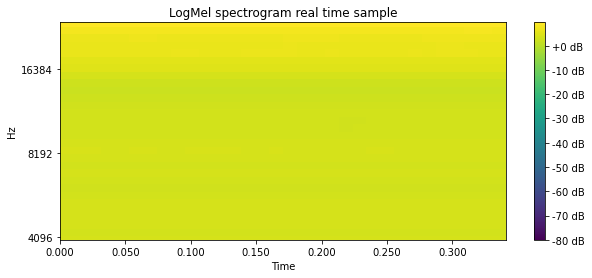

In [13]:
# Plot log mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(features, sr=sampling_freq, y_axis='mel',fmin=fmin,  fmax=24000,
                         x_axis='time', cmap='viridis', vmin=-top_db)
plt.colorbar(format='%+2.0f dB')
plt.title('LogMel spectrogram real time sample')
plt.show()

## Load model and make a prediction

In [14]:
# Load model
model = keras.models.load_model('wmc.h5', compile = True)

In [17]:
# Make the prediction
features_r = features.reshape(1, n_mels, n_stft_columns, 1)
prediction = model.predict(features_r)

print(prediction)

[[1.0000000e+00 5.6685483e-13 1.8722276e-22]]
